# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Reina Ratu Balqis]
- **Email:** [reinabalqis.123@gmail.com]
- **ID Dicoding:** [reinablqs]

## Menentukan Pertanyaan Bisnis

- Bagaimana Jumlah Peminjaman Berdasarkan Cuaca pada Hari Kerja vs Hari Libur?
- Pada jam berapa peminjaman sepeda oleh pengguna casual dan registered meningkat?

## Import Semua Packages/Library yang Digunakan

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [31]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [32]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**

Variable Definition

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit :

-- 1: Clear, Few clouds, Partly cloudy, Partly cloudy

-- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

-- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

-- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

### Assessing Data

#### Menilai tabel `hour_df`

In [33]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [34]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [35]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [36]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [37]:
hour_df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

#### Menilai tabel `day_df`

In [38]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [39]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [40]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [41]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [42]:
day_df.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

**Insight:**
- Data type pada variabel dteday belum berupa date
- Dari kedua tabel tidak terdapat duplikat dan missing value


### Cleaning Data

#### Cleaning `hour_df`

##### Mengubah tipe data `dteday` menjadi datetime

In [43]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

##### Mengubah value pada kolom `weathersit`

In [44]:
hour_df['weathersit'] = hour_df['weathersit'].map({1: 'Clear/Partly Cloudy', 2: 'Mist/Cloudy', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'})

##### Mengubah value pada kolom `workingday`

In [45]:
hour_df['workingday'] = hour_df['workingday'].map({0: 'Holiday', 1: 'Weekday'})


#### Cleaning `day_df`

##### Mengubah tipe data `dteday` menjadi datetime

In [46]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

##### Mengubah value pada kolom `weathersit`

In [47]:
day_df['weathersit'] = day_df['weathersit'].map({1: 'Clear/Partly Cloudy', 2: 'Mist/Cloudy', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'})

##### Mengubah value pada kolom `workingday`

In [48]:
day_df['workingday'] = day_df['workingday'].map({0: 'Holiday', 1: 'Weekday'})


**Insight:**
- Karena tipe data kolom dteday masih berupa object, maka tipe data diubah menjadi datetime
- Untuk menjawab pertanyaan 1 dan 2 diperlukan kolom weathersit dan workingday yang masih berupa integer, maka diubah menjadi nilai aslinya

#### Export Clean Data


In [49]:
hour_df.to_csv("dashboard\hour_df.csv", index=False)
day_df.to_csv("dashboard\day_df.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore `hour_df`

In [50]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
6052,6053,2011-09-14,3,0,9,18,0,3,Weekday,Clear/Partly Cloudy,0.72,0.6818,0.62,0.1642,83,503,586
14291,14292,2012-08-23,3,1,8,16,0,4,Weekday,Clear/Partly Cloudy,0.76,0.6818,0.48,0.1642,121,344,465
2009,2010,2011-03-29,2,0,3,14,0,2,Weekday,Clear/Partly Cloudy,0.36,0.3333,0.25,0.2537,20,66,86
500,501,2011-01-22,1,0,1,22,0,6,Holiday,Clear/Partly Cloudy,0.06,0.1515,0.49,0.0000,7,23,30
16797,16798,2012-12-07,4,1,12,16,0,5,Weekday,Clear/Partly Cloudy,0.36,0.3485,0.76,0.1343,39,336,375


In [51]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Weekday,Clear/Partly Cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### Jumlah peminjaman untuk pengguna `casual` dan `registered` 

In [52]:
usertype = pd.DataFrame({'Usertype': ['casual', 'registered'],
                           'Jumlah': [hour_df['casual'].sum(), hour_df['registered'].sum()]})
usertype

,Usertype,Jumlah
0,casual,620017
1,registered,2672662


### Explore `day_df`

In [53]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
47,48,2011-02-17,1,0,2,0,4,Weekday,Clear/Partly Cloudy,0.435833,0.428658,0.505000,0.230104,259,2216,2475
510,511,2012-05-25,2,1,5,0,5,Weekday,Clear/Partly Cloudy,0.680000,0.627529,0.747083,0.140550,1417,5317,6734
635,636,2012-09-27,4,1,9,0,4,Weekday,Mist/Cloudy,0.650000,0.607975,0.690833,0.134342,751,6642,7393
404,405,2012-02-09,1,1,2,0,4,Weekday,Clear/Partly Cloudy,0.265000,0.261988,0.562083,0.194037,163,3667,3830
148,149,2011-05-29,2,0,5,0,0,Holiday,Clear/Partly Cloudy,0.667500,0.615550,0.818750,0.213938,2355,2433,4788


In [54]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Weekday,Clear/Partly Cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Jumlah Rental Bikes pada tiap `weathersit`

In [55]:
day_df.groupby('weathersit')['cnt'].sum().reset_index()

,weathersit,cnt
0,Clear/Partly Cloudy,2257952
1,Light Rain/Snow,37869
2,Mist/Cloudy,996858


#### Jumlah Rental Bikes pada tiap `workingday`

In [56]:
day_df.groupby('workingday')['cnt'].sum().reset_index()

,workingday,cnt
0,Holiday,1000269
1,Weekday,2292410


**Insight:**
- Jumlah peminjaman sepeda lebih banyak dilakukan oleh pengguna `registered`
- Jumlah peminjaman pada `weathersit` heavy rain/snow di `day_df` tidak ada
- Jumlah peminjaman pada `Weekday` lebih banyak daripada saat `Holiday`

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Bagaimana Jumlah Peminjaman Berdasarkan Cuaca pada Hari Kerja vs Hari Libur?

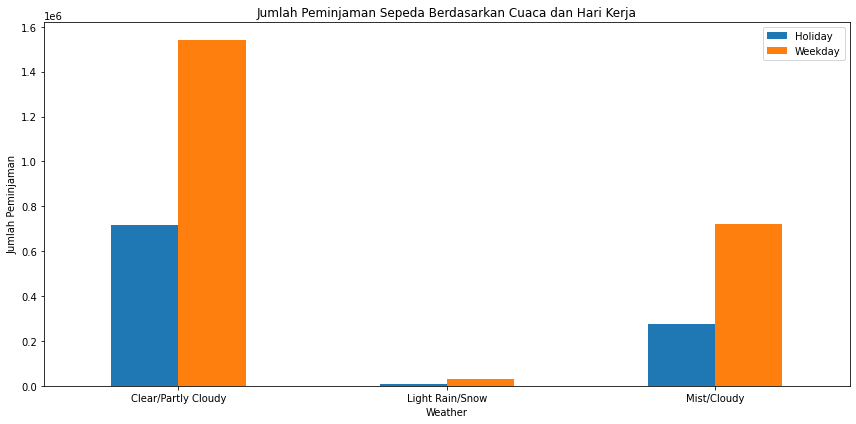

In [57]:
grouped_data = day_df.groupby(['weathersit', 'workingday'])['cnt'].sum().unstack()

grouped_data.plot(kind='bar', figsize=(12, 6))

plt.title('Jumlah Peminjaman Sepeda Berdasarkan Cuaca dan Hari Kerja')
plt.xlabel('Weather')
plt.ylabel('Jumlah Peminjaman')
plt.legend(labels=['Holiday', 'Weekday'])  # Ubah label sesuai dengan nilai di kolom working day
plt.xticks(rotation=0)  # Untuk mengatur posisi label di sumbu x
plt.tight_layout()  # untuk mengatur layout
plt.show()

**Insight:**
- Jumlah peminjaman sepeda paling banyak dilakukan pada saat cuaca Clear/Partly Cloudy
- Tidak ada peminjaman pada saat Heavy rain/snow

### Pertanyaan 2:

Pada jam berapa peminjaman sepeda oleh pengguna casual dan registered meningkat?

c:\Users\ACER\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ACER\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ACER\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ACER\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

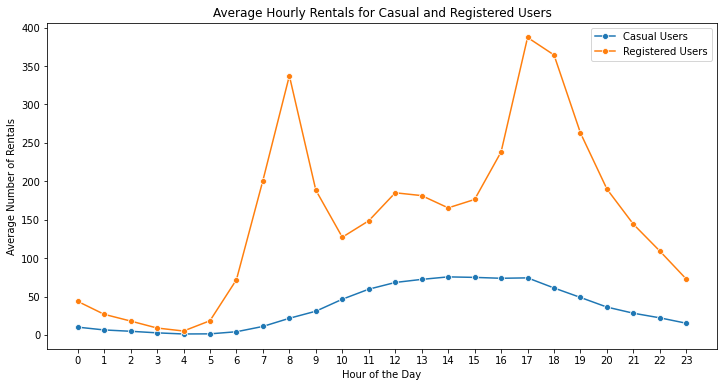

In [58]:
# Group by hour and calculate the mean rentals for casual and registered users
hourly_rentals = hour_df.groupby('hr')[['casual', 'registered']].mean().reset_index()

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='casual', data=hourly_rentals, label='Casual Users', marker='o')
sns.lineplot(x='hr', y='registered', data=hourly_rentals, label='Registered Users', marker='o')

# Add titles and labels
plt.title('Average Hourly Rentals for Casual and Registered Users')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Rentals')
plt.legend()
plt.xticks(range(0, 24))  # Set x-ticks from 0 to 23 to represent hours

# Show the plot
plt.show()

**Insight:**
- Pada registered user, peminjaman sepeda paling banyak dilkukan di jam 8 pagi dan jam 5 sampai 6 sore
- Pada casual user peminjaman sepeda tergolong tidak terlalu signifikan peminjamannya, dan stabil di jam 10 pagi sampai 7 malam

## Conclusion

- Conclution pertanyaan 1

Jumlah peminjaman sepeda paling banyak dilakukan pada saat cuaca clear/partly cloudy saat hari bekerja atau weekday. Dapat disimpulkan juga bahwa peminjaman sepeda kebanyakan digunakan sebagai transportasi untuk bekerja/sekolah karena peminjaman meningkat selama hari kerja/weekday. 

- Conclution pertanyaan 2

Peminjaman sepeda meningkat di jam 8 pagi dan 5-6 sore untuk registered user dimana pada jam tersebut merupakan jam berangkat dan jam pulang kerja/sekolah. 